<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/da11_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movielens 데이터 분석

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋 준비

In [2]:
# 데이터 파일이 저장된 경로
movies_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'
ratings_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
users_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/users.dat'

In [3]:
# DataFrame을 만들 때 사용할 컬럼 이름들
movies_cols = ['movie_id', 'title', 'genres']
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
users_cols = ['user_id', 'gender', 'age', 'occupation', 'zip_code']

In [4]:
movies = pd.read_csv(movies_dat, sep='::', engine='python', names=movies_cols)

In [5]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings = pd.read_csv(ratings_dat, sep='::', engine='python', names=ratings_cols)

In [8]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
users = pd.read_csv(users_dat, sep='::', engine='python', names=users_cols)

In [10]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


# merge(join)

*   ratings와 movies을 합침(merge).
*   위 결과와 users를 합침(merge).

In [14]:
df = pd.merge(ratings, movies, on='movie_id')

In [15]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [16]:
df = pd.merge(df, users, on='user_id')

In [17]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [18]:
df.tail()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662
1000208,4211,3834,2,965318885,Bronco Billy (1980),Adventure|Drama|Romance,M,45,5,77662


# 데이터 탐색

*   rating 빈도수
*   gender 빈도수
*   occupation 빈도수

In [19]:
df['rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

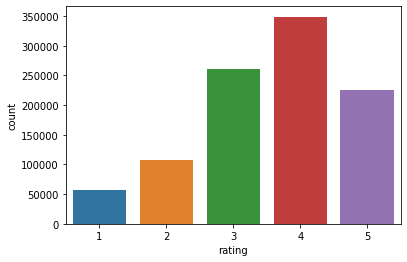

In [20]:
sns.countplot(x='rating', data=df)
plt.show()

In [21]:
df['gender'].value_counts()

M    753769
F    246440
Name: gender, dtype: int64

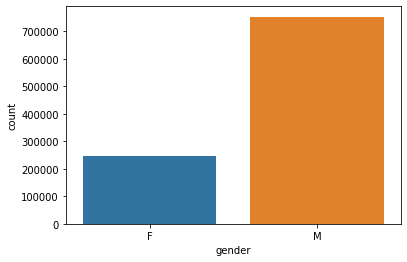

In [22]:
sns.countplot(x='gender', data=df)
plt.show()

In [23]:
df['occupation'].value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: occupation, dtype: int64

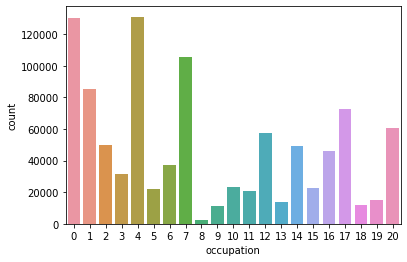

In [25]:
sns.countplot(x='occupation', data=df)
plt.show()

# 데이터 분석

## 영화별 별점 평균 상위 10개, 하위 10개

In [26]:
by_title = df.groupby('title')['rating'].mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [27]:
# 별점 평균 상위 10개
by_title.sort_values(ascending=False).head(10)

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

In [28]:
# 별점 평균 하위 10개
by_title.sort_values().head(10)

title
Elstree Calling (1930)                                        1.0
Get Over It (1996)                                            1.0
Venice/Venice (1992)                                          1.0
Windows (1980)                                                1.0
Kestrel's Eye (Falkens öga) (1998)                            1.0
McCullochs, The (1975)                                        1.0
Sleepover (1995)                                              1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Santa with Muscles (1996)                                     1.0
Name: rating, dtype: float64

In [30]:
# 영화별 빈도수, 별점 평균
df.groupby('title')['rating'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
title,,
Ulysses (Ulisse) (1954),1,5.0
Lured (1947),1,5.0
Follow the Bitch (1998),1,5.0
Bittersweet Motel (2000),1,5.0
Song of Freedom (1936),1,5.0
...,...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1,1.0
Cheetah (1989),1,1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),2,1.0


리뷰 건수가 1~2개 밖에 없는 영화들의 별점 평균을 계산하는 것은 큰 의미가 없을 것 같다. 일정 숫자 이상의 리뷰 건수가 있는 영화들을 선택해서 별점 분석을 하는 것이 더 의미가 있을 것 같다.

In [31]:
title_counts = df['title'].value_counts()
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Waiting Game, The (2000)                                    1
Shadows (Cienie) (1988)                                     1
Juno and Paycock (1930)                                     1
Resurrection Man (1998)                                     1
Windows (1980)                                              1
Name: title, Length: 3706, dtype: int64

In [32]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

리뷰 횟수(제목 등장 횟수)가 150번 이상인 영화들을 선택해서 분석

In [39]:
# 150번 이상 등장하는 영화 제목들
indexer = title_counts[title_counts >= 150].index
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Alligator (1980)', 'Cowboy Way, The (1994)', 'Twelfth Night (1996)',
       'Program, The (1993)', 'Love and Death on Long Island (1997)',
       'Asphalt Jungle, The (1950)',
       'Tales from the Crypt Presents: Bordello of Blood (1996)',
       'Golden Voyage of Sinbad, The (1974)', 'In the Army Now (1994)',
       'Police Academy 5: Assignment: Miami Beach (1988)'],
      dtype='object', length=1683)

In [45]:
# 150번 이상 나오는 영화 제목들 중에서 별점 평균 상위 10개
by_title.loc[indexer].sort_values(ascending=False).head(10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [46]:
# 150번 이상 나오는 영화 제목들 중에서 별점 평균 하위 10개
by_title.loc[indexer].sort_values(ascending=True).head(10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64